In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
raptor_team = pd.read_csv("historical_RAPTOR_by_team.csv")
raptor_player = pd.read_csv("historical_RAPTOR_by_player.csv")

### Preprocessing

#### Combine both aggregate and data split by reg season & post season for RAPTOR data.

In [3]:
raptor_player.tail()

,player_name,player_id,season,poss,mp,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
19154,Ivica Zubac,zubaciv01,2018,871,410,-2.903709,2.688832,-0.214877,0.531968,0.531968,0.000000,-2.616331,0.752875,-1.863456,0.311576
19155,Ivica Zubac,zubaciv01,2019,2345,1079,-2.362444,1.813768,-0.548676,1.217134,1.114995,0.102138,-2.810283,1.157824,-1.652459,0.077074
19156,Ivica Zubac,zubaciv01,2020,3447,1646,1.099849,3.549458,4.649308,6.224207,5.020903,1.203304,-0.310842,3.331974,3.021132,-0.410164
19157,Ivica Zubac,zubaciv01,2021,3908,1910,-0.909039,2.525735,1.616696,4.261327,3.704630,0.556697,-0.874338,2.280011,1.405673,-0.117623
19158,Ivica Zubac,zubaciv01,2022,3786,1852,-0.693765,0.723358,0.029594,2.626958,2.626958,0.000000,-1.134139,1.759848,0.625709,0.020823


In [4]:
raptor_player["season_type"] = ["TOT"]*raptor_player.shape[0]
raptor_player["team"] = [np.nan]*raptor_player.shape[0]
raptor_player = raptor_player[list(raptor_team.columns)]
raptor = pd.concat([raptor_player,raptor_team])
raptor

,player_name,player_id,season,season_type,team,poss,mp,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
0,Alaa Abdelnaby,abdelal01,1991,TOT,NaN,640,303,-3.938450,-0.510076,-4.448526,-0.265191,-0.226163,-0.039028,-3.905732,-1.696796,-5.602528,0.199241
1,Alaa Abdelnaby,abdelal01,1992,TOT,NaN,1998,959,-2.553849,-0.197943,-2.751792,-0.006893,0.070322,-0.077215,-2.499576,-0.721876,-3.221452,0.485436
2,Alaa Abdelnaby,abdelal01,1993,TOT,NaN,2754,1379,-2.373736,-2.069808,-4.443544,-1.227189,-0.845272,-0.381918,-2.328144,-2.002263,-4.330407,0.488266
3,Alaa Abdelnaby,abdelal01,1994,TOT,NaN,320,159,-6.140056,-2.748312,-8.888368,-0.500600,-0.500600,0.000000,-5.820936,-3.526560,-9.347496,0.511152
4,Alaa Abdelnaby,abdelal01,1995,TOT,NaN,984,506,-3.846543,-1.268012,-5.114556,-0.615802,-0.615802,0.000000,-3.715429,-1.027024,-4.742453,1.545922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29971,Ivica Zubac,zubaciv01,2020,PO,LAC,653,320,1.355250,3.069956,4.425206,1.203304,0.000000,1.203304,-1.778379,4.062312,2.283933,-0.401691
29972,Ivica Zubac,zubaciv01,2020,RS,LAC,2794,1326,1.040158,3.661525,4.701684,5.020903,5.020903,0.000000,0.032143,3.161284,3.193427,-0.412144
29973,Ivica Zubac,zubaciv01,2021,PO,LAC,590,301,-2.056054,2.840494,0.784440,0.556697,0.000000,0.556697,-2.104796,2.298023,0.193227,-0.544855
29974,Ivica Zubac,zubaciv01,2021,RS,LAC,3318,1609,-0.705079,2.469765,1.764686,3.704630,3.704630,0.000000,-0.655541,2.276808,1.621268,-0.041653


#### Salary Cap
---
`salary_cap` shows the league-wide salary cap for each season. Data is collected from [basketball-reference](https://www.basketball-reference.com/contracts/salary-cap-history.html). This will be used to normalize the player salaries as % of salary cap or as % of team payroll to allow for cross-time comparisons. There are some NBPA-NBA agreements that have shifted what max portion of the salary cap can be attributed for a player so I might need to normalize by the largest salary in each given season.

In [5]:
salary_caps = pd.read_excel('salary_caps.xlsx')
salary_caps.columns = ["Season", "Salary Cap", "Adjusted"]
salary_caps.head()

,Season,Salary Cap,Adjusted
0,1984-85,3600000,9793069.0
1,1985-86,4233000,11298280.0
2,1986-87,4945000,12734751.0
3,1987-88,6164000,15248702.0
4,1988-89,7232000,17069461.0


#### Convert `Season` to numeric for `salary_caps` and `salaries` data
---
`Season` in RAPTOR corresponds to the ending year of the season so 2021 is equivalent to the 2020-21 season. Since 2021 is easier to work with, we'll be converting to that.

In [6]:
salaries = pd.read_csv("player_salaries.csv")
salaries = salaries[salaries["Season"] != "Career"]
for i in range(salary_caps.shape[0]):
    salary_caps["Season"].values[i] = salary_caps["Season"].iloc[i].split("-")[0][:2] + salary_caps["Season"].iloc[i].split("-")[1]
for i in range(salaries.shape[0]):
    salaries["Season"].values[i] = salaries["Season"].iloc[i].split("-")[0][:2] + salaries["Season"].iloc[i].split("-")[1]
salary_caps["Season"] = pd.to_numeric(salary_caps["Season"])
salaries["Season"] = pd.to_numeric(salaries["Season"])
# fix case for 1999-00 becoming 1900:
salaries.loc[salaries['Season'] == 1900, 'Season'] = 2000
salary_caps.loc[salary_caps['Season'] == 1900, 'Season'] = 2000

In [7]:
salary_caps.tail()

,Season,Salary Cap,Adjusted
34,2019,101869000,116573245.0
35,2020,109140000,123384194.0
36,2021,109140000,117838496.0
37,2022,112414000,112414000.0
38,2023,123655000,NaN


In [8]:
salaries[salaries['Team'].isna()]

,Season,Team,Lg,Salary,player_id


#### Normalize salaries by cap

In [9]:
cap_dict = dict(zip(salary_caps["Season"], salary_caps["Salary Cap"]))
cap_dict

{1985: 3600000,
 1986: 4233000,
 1987: 4945000,
 1988: 6164000,
 1989: 7232000,
 1990: 9802000,
 1991: 11871000,
 1992: 12500000,
 1993: 14000000,
 1994: 15175000,
 1995: 15964000,
 1996: 23000000,
 1997: 24363000,
 1998: 26900000,
 1999: 30000000,
 2000: 34000000,
 2001: 35500000,
 2002: 42500000,
 2003: 40271000,
 2004: 43840000,
 2005: 43870000,
 2006: 49500000,
 2007: 53135000,
 2008: 55630000,
 2009: 58680000,
 2010: 57700000,
 2011: 58044000,
 2012: 58044000,
 2013: 58044000,
 2014: 58679000,
 2015: 63065000,
 2016: 70000000,
 2017: 94143000,
 2018: 99093000,
 2019: 101869000,
 2020: 109140000,
 2021: 109140000,
 2022: 112414000,
 2023: 123655000}

In [10]:
year_maskS = salaries["Season"] >= 1985
year_maskR = raptor["season"] >= 1985
new_salaries = salaries[year_maskS].copy()
norm_salary = [0] * new_salaries.shape[0]
for i in range(new_salaries.shape[0]):
    norm_salary[i] = new_salaries["Salary"].iloc[i]/cap_dict[new_salaries["Season"].iloc[i]]

new_salaries["Normalized Salary"] = norm_salary
new_salaries.columns = [string.lower() for string in list(new_salaries.columns)]
new_salaries

,season,team,lg,salary,player_id,normalized salary
0,1991,Portland Trail Blazers,NBA,395000,abdelal01,0.033274
1,1992,Portland Trail Blazers,NBA,494000,abdelal01,0.039520
2,1993,Boston Celtics,NBA,500000,abdelal01,0.035714
3,1994,Boston Celtics,NBA,805000,abdelal01,0.053048
4,1995,Sacramento Kings,NBA,650000,abdelal01,0.040717
...,...,...,...,...,...,...
19872,2018,Los Angeles Lakers,NBA,1312611,zubaciv01,0.013246
19873,2019,Los Angeles Clippers,NBA,1544951,zubaciv01,0.015166
19874,2020,Los Angeles Clippers,NBA,6481482,zubaciv01,0.059387
19875,2021,Los Angeles Clippers,NBA,7000000,zubaciv01,0.064138


In [11]:
len(new_salaries.player_id.unique())

2921

There are 2905 players since the 1984-85 season with salary data. 

In [12]:
num_teams = (new_salaries.value_counts(subset = ["season", "player_id"])
             .reset_index()
             .rename(columns = {0:"num_teams"})
)

num_teams = num_teams[num_teams['num_teams']> 1].sort_values(by='season')
num_teams

,season,player_id,num_teams
589,1986,johnsge02,2
367,1991,bannike01,2
503,1992,greenri01,2
155,1992,johnsvi01,2
208,1992,pritcke01,2
...,...,...,...
172,2022,hillge01,2
174,2022,hutchch01,2
176,2022,huntfe01,2
410,2022,schofad01,2


There are 577 cases where a player played for multiple teams in the same season and got paid by both teams.

In [13]:
new_salaries.value_counts(subset = ['season', 'team', 'player_id'])

season  team                player_id
2015    Dallas Mavericks    jamesbe01    2
        Houston Rockets     scolalu01    2
1985    Atlanta Hawks       brownri01    1
2013    Houston Rockets     robinth01    1
        Indiana Pacers      grangda01    1
                                        ..
2001    Milwaukee Bucks     kerseje01    1
                            mannida01    1
                            popema01     1
                            przybjo01    1
2022    Washington Wizards  winstca01    1
Length: 16945, dtype: int64

In [14]:
tdf = new_salaries[new_salaries['player_id'].isin(['scolalu01', 'jamesbe01'])]
tdf[tdf['season']==2015]

,season,team,lg,salary,player_id,normalized salary
8823,2015,Dallas Mavericks,NBA,915243,jamesbe01,0.014513
8824,2015,Dallas Mavericks,NBA,236866,jamesbe01,0.003756
15917,2015,Houston Rockets,NBA,6541000,scolalu01,0.103718
15918,2015,Houston Rockets,NBA,6172538,scolalu01,0.097876
15919,2015,Indiana Pacers,NBA,4868499,scolalu01,0.077198


There are two case where a player seems to be paid by the same team twice. In this case, we'll take the mean.

In [15]:
new_salaries.loc[8823, 'normalized salary'] = (new_salaries.loc[8823, 'normalized salary'] + new_salaries.loc[8824, 'normalized salary']) / 2
new_salaries.loc[15917, 'normalized salary'] = (new_salaries.loc[15917, 'normalized salary'] + new_salaries.loc[15918, 'normalized salary']) / 2

new_salaries = new_salaries.drop(index = [8824,15918])

In [63]:
tdf = new_salaries[new_salaries['player_id'].isin(['scolalu01', 'jamesbe01'])]
tdf[tdf['season']==2015]

,season,team,lg,salary,player_id,normalized salary
8823,2015,DAL,NBA,915243,jamesbe01,0.009134
15917,2015,HOU,NBA,6541000,scolalu01,0.100797
15919,2015,IND,NBA,4868499,scolalu01,0.077198


In [16]:
new_salaries

,season,team,lg,salary,player_id,normalized salary
0,1991,Portland Trail Blazers,NBA,395000,abdelal01,0.033274
1,1992,Portland Trail Blazers,NBA,494000,abdelal01,0.039520
2,1993,Boston Celtics,NBA,500000,abdelal01,0.035714
3,1994,Boston Celtics,NBA,805000,abdelal01,0.053048
4,1995,Sacramento Kings,NBA,650000,abdelal01,0.040717
...,...,...,...,...,...,...
19872,2018,Los Angeles Lakers,NBA,1312611,zubaciv01,0.013246
19873,2019,Los Angeles Clippers,NBA,1544951,zubaciv01,0.015166
19874,2020,Los Angeles Clippers,NBA,6481482,zubaciv01,0.059387
19875,2021,Los Angeles Clippers,NBA,7000000,zubaciv01,0.064138


#### Map team names to 3-letter abbreviation
---

First, we get a dictionary to map between full team name and the abbreviation and then convert all `team` to the 3-letter abbreviations in `new_salaries`.

In [17]:
raptor.head()

,player_name,player_id,season,season_type,team,poss,mp,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
0,Alaa Abdelnaby,abdelal01,1991,TOT,NaN,640,303,-3.938450,-0.510076,-4.448526,-0.265191,-0.226163,-0.039028,-3.905732,-1.696796,-5.602528,0.199241
1,Alaa Abdelnaby,abdelal01,1992,TOT,NaN,1998,959,-2.553849,-0.197943,-2.751792,-0.006893,0.070322,-0.077215,-2.499576,-0.721876,-3.221452,0.485436
2,Alaa Abdelnaby,abdelal01,1993,TOT,NaN,2754,1379,-2.373736,-2.069808,-4.443544,-1.227189,-0.845272,-0.381918,-2.328144,-2.002263,-4.330407,0.488266
3,Alaa Abdelnaby,abdelal01,1994,TOT,NaN,320,159,-6.140056,-2.748312,-8.888368,-0.500600,-0.500600,0.000000,-5.820936,-3.526560,-9.347496,0.511152
4,Alaa Abdelnaby,abdelal01,1995,TOT,NaN,984,506,-3.846543,-1.268012,-5.114556,-0.615802,-0.615802,0.000000,-3.715429,-1.027024,-4.742453,1.545922


In [18]:
np.sort(raptor[raptor['season_type'] != 'TOT']['team'].unique())

array(['ATL', 'BOS', 'BRK', 'BUF', 'CHA', 'CHH', 'CHI', 'CLE', 'DAL',
       'DEN', 'DET', 'GSW', 'HOU', 'IND', 'KCK', 'LAC', 'LAL', 'MEM',
       'MIA', 'MIL', 'MIN', 'NJN', 'NOH', 'NOJ', 'NOK', 'NOP', 'NYK',
       'NYN', 'OKC', 'ORL', 'PHI', 'PHO', 'POR', 'SAC', 'SAS', 'SDC',
       'SEA', 'TOR', 'UTA', 'VAN', 'WAS', 'WSB'], dtype=object)

In [19]:
np.sort(new_salaries.team.unique())

array(['Atlanta Hawks', 'Boston Celtics', 'Brooklyn Nets',
       'Charlotte Bobcats', 'Charlotte Hornets', 'Chicago Bulls',
       'Cleveland Cavaliers', 'Dallas Mavericks', 'Denver Nuggets',
       'Detroit Pistons', 'Golden State Warriors', 'Houston Rockets',
       'Indiana Pacers', 'Kansas City Kings', 'Los Angeles Clippers',
       'Los Angeles Lakers', 'Memphis Grizzlies', 'Miami Heat',
       'Milwaukee Bucks', 'Minnesota Timberwolves', 'New Jersey Nets',
       'New Orleans Hornets', 'New Orleans Pelicans',
       'New Orleans/Oklahoma City Hornets', 'New York Knicks',
       'Oklahoma City Thunder', 'Orlando Magic', 'Philadelphia 76ers',
       'Phoenix Suns', 'Portland Trail Blazers', 'Sacramento Kings',
       'San Antonio Spurs', 'Seattle SuperSonics', 'Toronto Raptors',
       'Utah Jazz', 'Vancouver Grizzlies', 'Washington Bullets',
       'Washington Wizards'], dtype=object)

In [20]:
teams = pd.read_table("NBA_teams.txt", sep = "\t")
team_to_abr = dict(zip(teams["Franchise"], teams["Abbreviation/Acronym"]))
team_to_abr

{'Atlanta Hawks': 'ATL',
 'Brooklyn Nets': 'BKN',
 'Boston Celtics': 'BOS',
 'Charlotte Hornets': 'CHA',
 'Chicago Bulls': 'CHI',
 'Cleveland Cavaliers': 'CLE',
 'Dallas Mavericks': 'DAL',
 'Denver Nuggets': 'DEN',
 'Detroit Pistons': 'DET',
 'Golden State Warriors': 'GSW',
 'Houston Rockets': 'HOU',
 'Indiana Pacers': 'IND',
 'Los Angeles Clippers': 'LAC',
 'Los Angeles Lakers': 'LAL',
 'Memphis Grizzlies': 'MEM',
 'Miami Heat': 'MIA',
 'Milwaukee Bucks': 'MIL',
 'Minnesota Timberwolves': 'MIN',
 'New Orleans Pelicans': 'NOP',
 'New York Knicks': 'NYK',
 'Oklahoma City Thunder': 'OKC',
 'Orlando Magic': 'ORL',
 'Philadelphia 76ers': 'PHI',
 'Phoenix Suns': 'PHX',
 'Portland Trail Blazers': 'POR',
 'Sacramento Kings': 'SAC',
 'San Antonio Spurs': 'SAS',
 'Toronto Raptors': 'TOR',
 'Utah Jazz': 'UTA',
 'Washington Wizards': 'WAS'}

We need to add these team:abr pairs since they're not in the original dict:
 * 'Charlotte Bobcats' = 'CHA'
 * 'Kansas City Kings' = 'KCK'
 * 'New Jersey Nets' = 'NJN'
 * 'New Orleans Hornets'  = 'NOH' 
 * 'New Orleans/Oklahoma City Hornets' = 'NOK'
 * 'Seattle SuperSonics' = 'SEA' 
 * 'Vancouver Grizzlies' = 'VAN' 
 * 'Washington Bullets' = 'WSB'

In [21]:
team_to_abr.update({
    'Charlotte Bobcats' : 'CHA',
    'Kansas City Kings' : 'KCK',
    'New Jersey Nets' : 'NJN',
    'New Orleans Hornets' : 'NOH',
    'New Orleans/Oklahoma City Hornets' : 'NOK',
    'Seattle SuperSonics' : 'SEA',
    'Vancouver Grizzlies' : 'VAN', 
    'Washington Bullets' : 'WSB'
}
)
team_to_abr

{'Atlanta Hawks': 'ATL',
 'Brooklyn Nets': 'BKN',
 'Boston Celtics': 'BOS',
 'Charlotte Hornets': 'CHA',
 'Chicago Bulls': 'CHI',
 'Cleveland Cavaliers': 'CLE',
 'Dallas Mavericks': 'DAL',
 'Denver Nuggets': 'DEN',
 'Detroit Pistons': 'DET',
 'Golden State Warriors': 'GSW',
 'Houston Rockets': 'HOU',
 'Indiana Pacers': 'IND',
 'Los Angeles Clippers': 'LAC',
 'Los Angeles Lakers': 'LAL',
 'Memphis Grizzlies': 'MEM',
 'Miami Heat': 'MIA',
 'Milwaukee Bucks': 'MIL',
 'Minnesota Timberwolves': 'MIN',
 'New Orleans Pelicans': 'NOP',
 'New York Knicks': 'NYK',
 'Oklahoma City Thunder': 'OKC',
 'Orlando Magic': 'ORL',
 'Philadelphia 76ers': 'PHI',
 'Phoenix Suns': 'PHX',
 'Portland Trail Blazers': 'POR',
 'Sacramento Kings': 'SAC',
 'San Antonio Spurs': 'SAS',
 'Toronto Raptors': 'TOR',
 'Utah Jazz': 'UTA',
 'Washington Wizards': 'WAS',
 'Charlotte Bobcats': 'CHA',
 'Kansas City Kings': 'KCK',
 'New Jersey Nets': 'NJN',
 'New Orleans Hornets': 'NOH',
 'New Orleans/Oklahoma City Hornets': 'NOK

In [22]:
team_issuesT = []
for i in range(new_salaries.shape[0]):
    try:
        new_salaries["team"].values[i] = team_to_abr[new_salaries["team"].iloc[i]]
    except:
        team_issuesT.append(new_salaries["team"].iloc[i])
print(np.unique(team_issuesT))

[]


In [23]:
new_salaries

,season,team,lg,salary,player_id,normalized salary
0,1991,POR,NBA,395000,abdelal01,0.033274
1,1992,POR,NBA,494000,abdelal01,0.039520
2,1993,BOS,NBA,500000,abdelal01,0.035714
3,1994,BOS,NBA,805000,abdelal01,0.053048
4,1995,SAC,NBA,650000,abdelal01,0.040717
...,...,...,...,...,...,...
19872,2018,LAL,NBA,1312611,zubaciv01,0.013246
19873,2019,LAC,NBA,1544951,zubaciv01,0.015166
19874,2020,LAC,NBA,6481482,zubaciv01,0.059387
19875,2021,LAC,NBA,7000000,zubaciv01,0.064138


In [24]:
print(set(team_to_abr.values()) -set(raptor[raptor['season_type'] != 'TOT']['team'].unique()))
print(set(raptor[raptor['season_type'] != 'TOT']['team'].unique()) - set(team_to_abr.values()))

{'BKN', 'PHX'}
{'BRK', 'SDC', 'PHO', 'NOJ', 'NYN', 'CHH', 'BUF'}


Next, we have to check that all team accroymns are set to the current 30 names:

    CHH is the older version of CHA.
    NOH is the older version of NOP.
    NOK is the older version of NOP during katrina.
    NJN is an older version of BKN (1977-2012).
    NYN is an older version of BKN (1968-77)
    BRK is the same as BKN. (BBR saves it as BRK instead of BKN)
    WSB is the older version of WAS.
    PHO is same as PHX. (BBR saves it as PHO)
    KCK is the older version of SAC.
    VAN is the older version of MEM.
    NOJ is the older version of UTA (1974-1979).
    BUF is an older version of LAC (1970-1978).
    SDC is an older version of LAC (1978-1984).

In [25]:
def fix_team_abrs(data, team_col = "team"):
    
    for i in range(data.shape[0]):
        # Aggregate Charlotte
        if data[team_col].values[i] == "CHH":
            data[team_col].values[i] = "CHA"
        # Aggregate New Orleans
        elif data[team_col].values[i] in {"NOH", "NOK"}:
            data[team_col].values[i] = "NOP"
        # Aggregate Brooklyn Nets
        elif data[team_col].values[i] in {"BRK", "NJN", "NYN"}:
            data[team_col].values[i] = "BKN"
        # Washington
        elif data[team_col].values[i] == "WSB":
            data[team_col].values[i] = "WAS"
        # Phoenix
        elif data[team_col].values[i] == "PHO":
            data[team_col].values[i] = "PHX"
        # Seattle -> OKC
        elif data[team_col].values[i] == "SEA":
            data[team_col].values[i] = "OKC"
        # Memphis Grizzlies
        elif data[team_col].values[i] == "VAN":
            data[team_col].values[i] = "MEM"
        # Kings
        elif data[team_col].values[i] == "KCK":
            data[team_col].values[i] = "SAC"
        # Utah Jazz
        elif data[team_col].values[i] == "NOJ":
            data[team_col].values[i] = "UTA"
        # Clippers
        elif data[team_col].values[i] in {'BUF','SDC'}:
            data[team_col].values[i] = "LAC"
        # Utah Jazz
    return data

In [26]:
new_salaries = fix_team_abrs(new_salaries, "team")
assert len(new_salaries.team.unique()) == 30

In [27]:
new_raptor1 = fix_team_abrs(raptor, 'team')
assert len(new_raptor1.team.dropna().unique()) == 30, "failed"

In [28]:
new_raptor1

,player_name,player_id,season,season_type,team,poss,mp,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
0,Alaa Abdelnaby,abdelal01,1991,TOT,NaN,640,303,-3.938450,-0.510076,-4.448526,-0.265191,-0.226163,-0.039028,-3.905732,-1.696796,-5.602528,0.199241
1,Alaa Abdelnaby,abdelal01,1992,TOT,NaN,1998,959,-2.553849,-0.197943,-2.751792,-0.006893,0.070322,-0.077215,-2.499576,-0.721876,-3.221452,0.485436
2,Alaa Abdelnaby,abdelal01,1993,TOT,NaN,2754,1379,-2.373736,-2.069808,-4.443544,-1.227189,-0.845272,-0.381918,-2.328144,-2.002263,-4.330407,0.488266
3,Alaa Abdelnaby,abdelal01,1994,TOT,NaN,320,159,-6.140056,-2.748312,-8.888368,-0.500600,-0.500600,0.000000,-5.820936,-3.526560,-9.347496,0.511152
4,Alaa Abdelnaby,abdelal01,1995,TOT,NaN,984,506,-3.846543,-1.268012,-5.114556,-0.615802,-0.615802,0.000000,-3.715429,-1.027024,-4.742453,1.545922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29971,Ivica Zubac,zubaciv01,2020,PO,LAC,653,320,1.355250,3.069956,4.425206,1.203304,0.000000,1.203304,-1.778379,4.062312,2.283933,-0.401691
29972,Ivica Zubac,zubaciv01,2020,RS,LAC,2794,1326,1.040158,3.661525,4.701684,5.020903,5.020903,0.000000,0.032143,3.161284,3.193427,-0.412144
29973,Ivica Zubac,zubaciv01,2021,PO,LAC,590,301,-2.056054,2.840494,0.784440,0.556697,0.000000,0.556697,-2.104796,2.298023,0.193227,-0.544855
29974,Ivica Zubac,zubaciv01,2021,RS,LAC,3318,1609,-0.705079,2.469765,1.764686,3.704630,3.704630,0.000000,-0.655541,2.276808,1.621268,-0.041653


#### Filter RAPTOR data to only include players with salaries.

In [29]:
temp = raptor[raptor['season_type'] != 'TOT']
temp[temp['team'].isna()]

,player_name,player_id,season,season_type,team,poss,mp,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact


In [30]:
new_raptor = new_raptor1[year_maskR].reset_index(drop =True)
# new_raptor = new_raptor.reset_index(drop=True)
# new_raptor = new_raptor[new_raptor["player_id"].isin(new_salaries.player_id.unique())]
new_raptor

,player_name,player_id,season,season_type,team,poss,mp,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
0,Alaa Abdelnaby,abdelal01,1991,TOT,NaN,640,303,-3.938450,-0.510076,-4.448526,-0.265191,-0.226163,-0.039028,-3.905732,-1.696796,-5.602528,0.199241
1,Alaa Abdelnaby,abdelal01,1992,TOT,NaN,1998,959,-2.553849,-0.197943,-2.751792,-0.006893,0.070322,-0.077215,-2.499576,-0.721876,-3.221452,0.485436
2,Alaa Abdelnaby,abdelal01,1993,TOT,NaN,2754,1379,-2.373736,-2.069808,-4.443544,-1.227189,-0.845272,-0.381918,-2.328144,-2.002263,-4.330407,0.488266
3,Alaa Abdelnaby,abdelal01,1994,TOT,NaN,320,159,-6.140056,-2.748312,-8.888368,-0.500600,-0.500600,0.000000,-5.820936,-3.526560,-9.347496,0.511152
4,Alaa Abdelnaby,abdelal01,1995,TOT,NaN,984,506,-3.846543,-1.268012,-5.114556,-0.615802,-0.615802,0.000000,-3.715429,-1.027024,-4.742453,1.545922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42972,Ivica Zubac,zubaciv01,2020,PO,LAC,653,320,1.355250,3.069956,4.425206,1.203304,0.000000,1.203304,-1.778379,4.062312,2.283933,-0.401691
42973,Ivica Zubac,zubaciv01,2020,RS,LAC,2794,1326,1.040158,3.661525,4.701684,5.020903,5.020903,0.000000,0.032143,3.161284,3.193427,-0.412144
42974,Ivica Zubac,zubaciv01,2021,PO,LAC,590,301,-2.056054,2.840494,0.784440,0.556697,0.000000,0.556697,-2.104796,2.298023,0.193227,-0.544855
42975,Ivica Zubac,zubaciv01,2021,RS,LAC,3318,1609,-0.705079,2.469765,1.764686,3.704630,3.704630,0.000000,-0.655541,2.276808,1.621268,-0.041653


In [31]:
new_raptor['team'].unique()

array([nan, 'POR', 'BOS', 'MIL', 'PHI', 'SAC', 'LAL', 'DEN', 'MEM', 'ORL',
       'DAL', 'ATL', 'OKC', 'MIA', 'TOR', 'DET', 'LAC', 'HOU', 'WAS',
       'NYK', 'BKN', 'PHX', 'CHA', 'NOP', 'CLE', 'GSW', 'MIN', 'SAS',
       'UTA', 'CHI', 'IND'], dtype=object)

In [32]:
# inner join
tdf1 = new_raptor.merge(new_salaries, on = ["player_id","team","season"])
tdf1.shape#, how ='left')

(22055, 20)

In [33]:
tdf1

,player_name,player_id,season,season_type,team,poss,mp,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact,lg,salary,normalized salary
0,Alaa Abdelnaby,abdelal01,1991,PO,POR,26,13,-6.565556,-1.999625,-8.565181,-0.039028,0.000000,-0.039028,-6.966437,-4.170021,-11.136458,-1.785247,NBA,395000,0.033274
1,Alaa Abdelnaby,abdelal01,1991,RS,POR,614,290,-3.827204,-0.447001,-4.274205,-0.226163,-0.226163,0.000000,-3.776125,-1.592067,-5.368192,0.283274,NBA,395000,0.033274
2,Alaa Abdelnaby,abdelal01,1992,PO,POR,50,25,-5.430838,-3.112862,-8.543700,-0.077215,0.000000,-0.077215,-5.722269,-4.144577,-9.866847,1.216643,NBA,494000,0.039520
3,Alaa Abdelnaby,abdelal01,1992,RS,POR,1948,934,-2.480005,-0.123125,-2.603129,0.070322,0.070322,0.000000,-2.416858,-0.634025,-3.050883,0.466668,NBA,494000,0.039520
4,Alaa Abdelnaby,abdelal01,1993,PO,BOS,128,68,-9.774333,-3.596499,-13.370831,-0.381918,0.000000,-0.381918,-9.480059,-4.481334,-13.961393,0.456135,NBA,500000,0.035714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22050,Ivica Zubac,zubaciv01,2020,PO,LAC,653,320,1.355250,3.069956,4.425206,1.203304,0.000000,1.203304,-1.778379,4.062312,2.283933,-0.401691,NBA,6481482,0.059387
22051,Ivica Zubac,zubaciv01,2020,RS,LAC,2794,1326,1.040158,3.661525,4.701684,5.020903,5.020903,0.000000,0.032143,3.161284,3.193427,-0.412144,NBA,6481482,0.059387
22052,Ivica Zubac,zubaciv01,2021,PO,LAC,590,301,-2.056054,2.840494,0.784440,0.556697,0.000000,0.556697,-2.104796,2.298023,0.193227,-0.544855,NBA,7000000,0.064138
22053,Ivica Zubac,zubaciv01,2021,RS,LAC,3318,1609,-0.705079,2.469765,1.764686,3.704630,3.704630,0.000000,-0.655541,2.276808,1.621268,-0.041653,NBA,7000000,0.064138


In [34]:
# outer join
tdf2= new_raptor.merge(new_salaries, on =["player_id", 'team', "season"], how ='left')
tdf2.shape

(42977, 20)

In [35]:
len(set(zip(new_raptor.season,new_raptor.player_id)) - set(zip(new_salaries.season,new_salaries.player_id)))

1496

In [36]:
len(set(zip(new_salaries.season,new_salaries.player_id)) - set(zip(new_raptor.season,new_raptor.player_id)))

1028

{ignored comment -- don't delete}
<!-- Contracts are complicated but for the sake of simplicity, we can assume that each team paid out the salary proportional to the number of games played for the team. To do so, we'll need to get data for the number of games played for each team for each of the 468 unique players. This is hard to do so since Basketball-Reference recently removed their widget feature that allows me to call the backend table directly. Instead, now I need multiple multiple clicks to get the actual table values as HTML.

Ideally, a player's GP can be accessed here:
https://www.basketball-reference.com/players/a/abdelal01.html#per_game

Unfortunately, due the extra hassle for very little payoff, we'll use `mp` as a proxy for the number of games played. -->

##### Mege by including Team ID
---

In [37]:
final_raptor = tdf2.copy()

In [38]:
final_raptor = final_raptor.merge(
    salary_caps.rename(
        columns = {
            'Season':'season', 
            'Salary Cap': 'salary_cap',
            'Adjusted': '2022 salary'
        }
    ),
    on = 'season', how = 'left')

In [39]:
final_raptor

,player_name,player_id,season,season_type,team,poss,mp,raptor_offense,raptor_defense,raptor_total,...,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact,lg,salary,normalized salary,salary_cap,2022 salary
0,Alaa Abdelnaby,abdelal01,1991,TOT,NaN,640,303,-3.938450,-0.510076,-4.448526,...,-0.039028,-3.905732,-1.696796,-5.602528,0.199241,NaN,NaN,NaN,11871000,25499592.0
1,Alaa Abdelnaby,abdelal01,1992,TOT,NaN,1998,959,-2.553849,-0.197943,-2.751792,...,-0.077215,-2.499576,-0.721876,-3.221452,0.485436,NaN,NaN,NaN,12500000,26061180.0
2,Alaa Abdelnaby,abdelal01,1993,TOT,NaN,2754,1379,-2.373736,-2.069808,-4.443544,...,-0.381918,-2.328144,-2.002263,-4.330407,0.488266,NaN,NaN,NaN,14000000,28354756.0
3,Alaa Abdelnaby,abdelal01,1994,TOT,NaN,320,159,-6.140056,-2.748312,-8.888368,...,0.000000,-5.820936,-3.526560,-9.347496,0.511152,NaN,NaN,NaN,15175000,29954782.0
4,Alaa Abdelnaby,abdelal01,1995,TOT,NaN,984,506,-3.846543,-1.268012,-5.114556,...,0.000000,-3.715429,-1.027024,-4.742453,1.545922,NaN,NaN,NaN,15964000,30651995.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42972,Ivica Zubac,zubaciv01,2020,PO,LAC,653,320,1.355250,3.069956,4.425206,...,1.203304,-1.778379,4.062312,2.283933,-0.401691,NBA,6481482.0,0.059387,109140000,123384194.0
42973,Ivica Zubac,zubaciv01,2020,RS,LAC,2794,1326,1.040158,3.661525,4.701684,...,0.000000,0.032143,3.161284,3.193427,-0.412144,NBA,6481482.0,0.059387,109140000,123384194.0
42974,Ivica Zubac,zubaciv01,2021,PO,LAC,590,301,-2.056054,2.840494,0.784440,...,0.556697,-2.104796,2.298023,0.193227,-0.544855,NBA,7000000.0,0.064138,109140000,117838496.0
42975,Ivica Zubac,zubaciv01,2021,RS,LAC,3318,1609,-0.705079,2.469765,1.764686,...,0.000000,-0.655541,2.276808,1.621268,-0.041653,NBA,7000000.0,0.064138,109140000,117838496.0


In [40]:
final_raptor.to_csv("cleaned_raptor_full.csv", index=False)

In [41]:
post_season = final_raptor[final_raptor["season_type"] == "PO"]
reg_season = final_raptor[final_raptor["season_type"] == "RS"]
tot_season = final_raptor[final_raptor["season_type"] == "TOT"]

#### Minutes filtering.
---
Cut down size of raptor by players who at least played 290 total minutes for a given team in a season minutes since this amounts to playing at least 5 minutes a game across 58 games of the 82 games (~70%) to only account for established players including both role and starters but not benchwarmers. (70% is used since this is the NBA cuttof for seasonal awards).

This also filters out player who were injured in the season and didn't make a meaningful contribution. If we plot the histogram, we see that this point could be the elbow point.

CPU times: user 579 ms, sys: 21.7 ms, total: 600 ms
Wall time: 599 ms


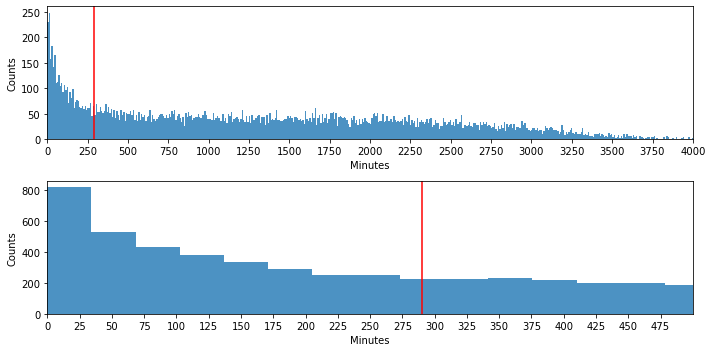

In [42]:
%%time
fig = plt.figure(figsize = (10,5))
plt.subplot(211)
a = plt.hist(tot_season["mp"], bins = 500, alpha = 0.8)
plt.axvline(x = 290, c = "r")
plt.xticks(np.arange(0,4010,250))
plt.xlim(0,4000)
plt.xlabel("Minutes")
plt.ylabel("Counts")
plt.subplot(212)
a = plt.hist(tot_season["mp"], bins = 125, alpha = 0.8)
plt.axvline(x = 290, c = "r")
plt.xticks(np.arange(0,500,25))
plt.xlim(0,500)
plt.xlabel("Minutes")
plt.ylabel("Counts")
plt.tight_layout()

How RAPTOR works:

https://fivethirtyeight.com/features/how-our-raptor-metric-works/

Essentially rates a player's play and value based on box-score as well as play-by-play metrics. Specifically designed for the modern NBA so it places a greater emphasis on ball-dominant players and 2-way wings while reducing the drastic bias toward centers as done by traditional metrics (sometimes is a little harsh). Named because it correctly predicted raptors winning in 2019 over GSW :(.

Essentially rates how good a player is. Actual data from 2013-2014 onwards but simulated data from 1976-2013.

In [43]:
# store season-pair tuples that match the mask
minute_mask = tot_season["mp"] >290
minute_filter = set(zip(tot_season[minute_mask]["season"], tot_season[minute_mask]["player_id"]))

# only 12887 season-players combinations satisfy this filter
print(len(minute_filter))

# get all salary rows that satisfy this filter
filtered_salaries_ind = []
for i in range(new_salaries.shape[0]):
    value = tuple([new_salaries["season"].values[i], new_salaries["player_id"].values[i]])
    if value in minute_filter:
        filtered_salaries_ind.append(new_salaries.index[i])

filtered_salaries = new_salaries.loc[filtered_salaries_ind,]
# also get rid of those with no salary info
filtered_salaries = filtered_salaries[filtered_salaries["salary"]!=0]

print(filtered_salaries.shape)
# get all Raptor rows that satisfy this filter
filtered_raptor_ind = []
for i in range(final_raptor.shape[0]):
    value = tuple([final_raptor["season"].values[i], final_raptor["player_id"].values[i]])
    if value in minute_filter:
        filtered_raptor_ind.append(new_raptor.index[i])

filtered_raptor = final_raptor.loc[filtered_raptor_ind,]
print(filtered_raptor.shape)


13370
(12892, 6)
(35085, 22)


In [44]:
final_raptor[final_raptor["season_type"] == "TOT"].shape

(16765, 22)

In [45]:
filtered_raptor[filtered_raptor["season_type"] == "TOT"].shape

(13370, 22)

In [46]:
filtered_salaries.value_counts(subset = ["season", "player_id",]).head(8)

season  player_id
2018    kilpase01    4
2022    gabriwe01    3
2019    canaais01    3
2013    mcguido01    3
2018    rosede01     3
2007    anderde01    3
2013    livinsh01    3
2011    geeal01      3
dtype: int64

In [47]:
# print(filtered_salaries[filtered_salaries["player_id"] == "jonesma05"])
# print(filtered_salaries[filtered_salaries["player_id"] == "stevela01"])
# print(filtered_salaries[filtered_salaries["player_id"] == "watanyu01"])
# print(filtered_salaries[filtered_salaries["player_id"] == "marshna01"])

# print(filtered_salaries[filtered_salaries["player_id"] == "toscaju01"])
# # print(filtered_salaries[filtered_salaries["player_id"] == "brownmo01"])
# print(filtered_salaries[filtered_salaries["player_id"] == "metuch01"])
# print(filtered_salaries[filtered_salaries["player_id"] == "scolalu01"])

In [48]:
# print(filtered_raptor[filtered_raptor["player_id"] == "jonesma05"].iloc[:,:5])
# print(filtered_raptor[filtered_raptor["player_id"] == "stevela01"].iloc[:,:5])
# print(filtered_raptor[filtered_raptor["player_id"] == "watanyu01"].iloc[:,:5])
# print(filtered_raptor[filtered_raptor["player_id"] == "marshna01"].iloc[:,:5])

# print(filtered_raptor[filtered_raptor["player_id"] == "toscaju01"].iloc[:,:5])
# print(filtered_raptor[filtered_raptor["player_id"] == "brownmo01"].iloc[:,:5])
# print(filtered_raptor[filtered_raptor["player_id"] == "metuch01"].iloc[:,:5])
# print(filtered_raptor[filtered_raptor["player_id"] == "scolalu01"].iloc[:,:5])

#### Merge
---
Now that all sets are cleaned, we can finally join the two dataframes to get final ouput.

In [49]:
filtered_salaries

,season,team,lg,salary,player_id,normalized salary
0,1991,POR,NBA,395000,abdelal01,0.033274
1,1992,POR,NBA,494000,abdelal01,0.039520
2,1993,BOS,NBA,500000,abdelal01,0.035714
4,1995,SAC,NBA,650000,abdelal01,0.040717
6,1985,LAL,NBA,1530000,abdulka01,0.425000
...,...,...,...,...,...,...
19872,2018,LAL,NBA,1312611,zubaciv01,0.013246
19873,2019,LAC,NBA,1544951,zubaciv01,0.015166
19874,2020,LAC,NBA,6481482,zubaciv01,0.059387
19875,2021,LAC,NBA,7000000,zubaciv01,0.064138


In [50]:
# outer join
full_data = filtered_raptor[filtered_raptor["season_type"] != "TOT"]#.merge(filtered_salaries, on =["player_id", "season", "team"], how ='left')
full_data

,player_name,player_id,season,season_type,team,poss,mp,raptor_offense,raptor_defense,raptor_total,...,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact,lg,salary,normalized salary,salary_cap,2022 salary
16765,Alaa Abdelnaby,abdelal01,1991,PO,POR,26,13,-6.565556,-1.999625,-8.565181,...,-0.039028,-6.966437,-4.170021,-11.136458,-1.785247,NBA,395000.0,0.033274,11871000,25499592.0
16766,Alaa Abdelnaby,abdelal01,1991,RS,POR,614,290,-3.827204,-0.447001,-4.274205,...,0.000000,-3.776125,-1.592067,-5.368192,0.283274,NBA,395000.0,0.033274,11871000,25499592.0
16767,Alaa Abdelnaby,abdelal01,1992,PO,POR,50,25,-5.430838,-3.112862,-8.543700,...,-0.077215,-5.722269,-4.144577,-9.866847,1.216643,NBA,494000.0,0.039520,12500000,26061180.0
16768,Alaa Abdelnaby,abdelal01,1992,RS,POR,1948,934,-2.480005,-0.123125,-2.603129,...,0.000000,-2.416858,-0.634025,-3.050883,0.466668,NBA,494000.0,0.039520,12500000,26061180.0
16769,Alaa Abdelnaby,abdelal01,1993,PO,BOS,128,68,-9.774333,-3.596499,-13.370831,...,-0.381918,-9.480059,-4.481334,-13.961393,0.456135,NBA,500000.0,0.035714,14000000,28354756.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42972,Ivica Zubac,zubaciv01,2020,PO,LAC,653,320,1.355250,3.069956,4.425206,...,1.203304,-1.778379,4.062312,2.283933,-0.401691,NBA,6481482.0,0.059387,109140000,123384194.0
42973,Ivica Zubac,zubaciv01,2020,RS,LAC,2794,1326,1.040158,3.661525,4.701684,...,0.000000,0.032143,3.161284,3.193427,-0.412144,NBA,6481482.0,0.059387,109140000,123384194.0
42974,Ivica Zubac,zubaciv01,2021,PO,LAC,590,301,-2.056054,2.840494,0.784440,...,0.556697,-2.104796,2.298023,0.193227,-0.544855,NBA,7000000.0,0.064138,109140000,117838496.0
42975,Ivica Zubac,zubaciv01,2021,RS,LAC,3318,1609,-0.705079,2.469765,1.764686,...,0.000000,-0.655541,2.276808,1.621268,-0.041653,NBA,7000000.0,0.064138,109140000,117838496.0


Some players don't have salary information for teams they got traded from in mid-season while others do. For the sake of simplicity and the fact I've spent 15+ hours trying to clean this data, I'm simply going to drop the data

In [51]:
full_data[full_data["salary"].isna()]

,player_name,player_id,season,season_type,team,poss,mp,raptor_offense,raptor_defense,raptor_total,...,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact,lg,salary,normalized salary,salary_cap,2022 salary
16771,Alaa Abdelnaby,abdelal01,1993,RS,MIL,322,159,-3.210418,-1.687082,-4.897499,...,0.000000,-3.232559,-1.696312,-4.928871,0.811583,NaN,NaN,NaN,14000000,28354756.0
16773,Alaa Abdelnaby,abdelal01,1995,RS,PHI,58,30,-19.426711,-5.753303,-25.180014,...,0.000000,-17.705974,-7.713219,-25.419193,-0.355770,NaN,NaN,NaN,15964000,30651995.0
16779,Kareem Abdul-Jabbar,abdulka01,1987,PO,LAL,1184,559,0.579291,1.903181,2.482471,...,1.532849,1.022664,1.198616,2.221281,-0.401656,NaN,NaN,NaN,4945000,12734751.0
16780,Kareem Abdul-Jabbar,abdulka01,1987,RS,LAL,5226,2441,0.113020,0.763810,0.876830,...,0.000000,0.608637,0.464766,1.073403,-0.159095,NaN,NaN,NaN,4945000,12734751.0
16800,Tariq Abdul-Wahad,abdulta01,2000,RS,ORL,2471,1205,-0.866708,0.198902,-0.667806,...,0.000000,-0.902159,0.518223,-0.383937,0.152738,NaN,NaN,NaN,34000000,57763864.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42893,Thaddeus Young,youngth01,2015,RS,MIN,3205,1605,0.306193,0.403151,0.709344,...,0.000000,0.215674,0.493914,0.709589,-0.012254,NaN,NaN,NaN,63065000,77841847.0
42904,Thaddeus Young,youngth01,2022,RS,SAS,788,370,-0.746809,-1.363910,-2.110719,...,0.000000,-0.455588,-1.106520,-1.562108,0.480847,NaN,NaN,NaN,112414000,112414000.0
42937,Tyler Zeller,zellety01,2018,RS,BKN,1456,703,-2.606880,-0.337004,-2.943884,...,0.000000,-3.137505,-0.599272,-3.736777,-0.328507,NaN,NaN,NaN,99093000,115455294.0
42955,George Zidek,zidekge01,1997,RS,DEN,171,88,1.674326,-2.489380,-0.815054,...,0.000000,0.754412,-2.163921,-1.409508,0.540321,NaN,NaN,NaN,24363000,44402880.0


<AxesSubplot:>

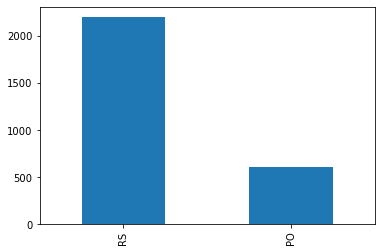

In [52]:
full_data[full_data["salary"].isna()]["season_type"].value_counts().plot(kind = "bar")

<AxesSubplot:ylabel='index'>

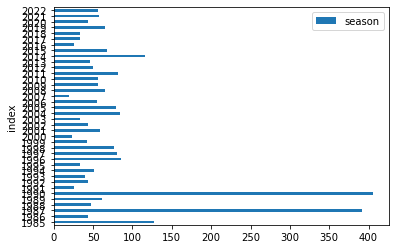

In [53]:
full_data[full_data["salary"].isna()]['season'].value_counts().reset_index().sort_values(by='index').plot(x = 'index', y ='season', kind='barh')

<AxesSubplot:>

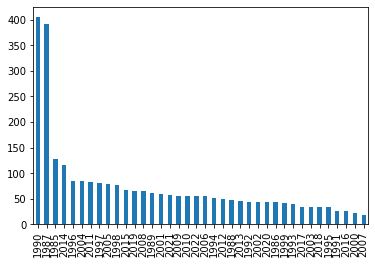

In [54]:
full_data[full_data["salary"].isna()]['season'].value_counts().plot(kind= 'bar')

(array([610., 536., 209., 199., 160., 237., 177., 294., 162., 221.]),
 array([1985. , 1988.7, 1992.4, 1996.1, 1999.8, 2003.5, 2007.2, 2010.9,
        2014.6, 2018.3, 2022. ]),
 <BarContainer object of 10 artists>)

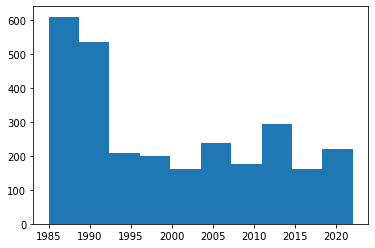

In [55]:
plt.hist(full_data[full_data["salary"].isna()]["season"])

<AxesSubplot:>

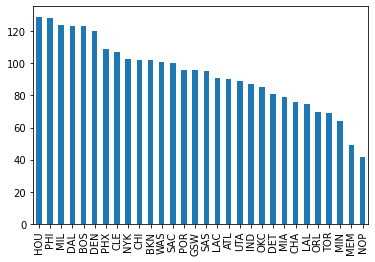

In [56]:
full_data[full_data["salary"].isna()]["team"].value_counts().plot(kind="bar")

In [57]:
full_data.dropna().to_csv("munged_salary_raptor.csv", index=False)

In [62]:
new_salaries.merge(
    salary_caps.rename(
        columns = {
            'Season':'season', 
            'Salary Cap': 'salary_cap',
            'Adjusted': '2022 salary'
        }
    ),
    on = 'season', how = 'left'
).to_csv('cleaned_normalized_salaries.csv', index=False)